In [1]:
# importing libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from IPython.display import display
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


In [2]:
# importing Data
df = pd.read_csv('anomaly_detection.csv')
print('Shape of the data :', df.shape)
display(df.head())


Shape of the data : (365, 5)


,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,0.000000,0.000000,3.000000,3.000000,8.000000
1,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2.540129,0.606709,3.180950,3.464811,7.817440
3,5.520271,1.470812,3.330528,2.968375,7.409152
4,5.914298,2.745060,3.061706,3.440980,7.153049


In [3]:
# adding date column
df['date'] = pd.date_range('01-01-2016', '30-12-2016')
df.head()


,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,date
0,0.000000,0.000000,3.000000,3.000000,8.000000,2016-01-01
1,1.232260,-0.217305,3.193780,3.489992,7.792553,2016-01-02
2,2.540129,0.606709,3.180950,3.464811,7.817440,2016-01-03
3,5.520271,1.470812,3.330528,2.968375,7.409152,2016-01-04
4,5.914298,2.745060,3.061706,3.440980,7.153049,2016-01-05


In [4]:
# setting index as column
df.set_index('date', inplace=True)
df.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
date,,,,,
2016-01-01,0.000000,0.000000,3.000000,3.000000,8.000000
2016-01-02,1.232260,-0.217305,3.193780,3.489992,7.792553
2016-01-03,2.540129,0.606709,3.180950,3.464811,7.817440
2016-01-04,5.520271,1.470812,3.330528,2.968375,7.409152
2016-01-05,5.914298,2.745060,3.061706,3.440980,7.153049


In [5]:
# splitting the data into train and test
# since the analyst did not review the last 3 month we use them as test
# and fitst  9 months as train.

df_train = df.loc[:'2016-09-30']
print('train data :')
display(df_train)
print('\n\n')
df_test = df.loc['2016-10-01':]
print('test data :')
display(df_test)

train data :


,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
date,,,,,
2016-01-01,0.000000,0.000000,3.000000,3.000000,8.000000
2016-01-02,1.232260,-0.217305,3.193780,3.489992,7.792553
2016-01-03,2.540129,0.606709,3.180950,3.464811,7.817440
2016-01-04,5.520271,1.470812,3.330528,2.968375,7.409152
2016-01-05,5.914298,2.745060,3.061706,3.440980,7.153049
...,...,...,...,...,...
2016-09-26,14.133139,7.947718,1.800914,6.852511,9.812531
2016-09-27,13.673763,7.091657,1.611077,6.991557,9.378149
2016-09-28,12.138013,6.593396,1.228136,6.763265,9.575867





test data :


,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
date,,,,,
2016-10-01,8.046032,5.295155,0.490067,5.972950,9.221123
2016-10-02,8.769270,4.184700,0.815883,5.476941,8.813725
2016-10-03,8.311614,4.632987,0.679195,5.056123,8.552767
2016-10-04,7.850020,3.950758,0.800483,5.045620,8.481428
2016-10-05,8.176031,3.795881,0.791072,5.016191,8.465436
...,...,...,...,...,...
2016-12-26,11.364339,-0.925751,-3.259216,6.572904,11.452315
2016-12-27,11.316572,-0.081164,-3.746738,6.252706,11.859704
2016-12-28,10.841367,-0.317127,-3.680397,6.617491,11.644486


In [6]:
# labelling the data
# since there were anomalies in data during 02/14/16 and 02/21/16
# we label them as 1 and rest all as 0

# adding a column in df_train
df_train['anomaly'] = 0
df_train['anomaly']['2016-02-14':'2016-02-21'] = 1
df_train.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,anomaly
date,,,,,,
2016-01-01,0.000000,0.000000,3.000000,3.000000,8.000000,0
2016-01-02,1.232260,-0.217305,3.193780,3.489992,7.792553,0
2016-01-03,2.540129,0.606709,3.180950,3.464811,7.817440,0
2016-01-04,5.520271,1.470812,3.330528,2.968375,7.409152,0
2016-01-05,5.914298,2.745060,3.061706,3.440980,7.153049,0


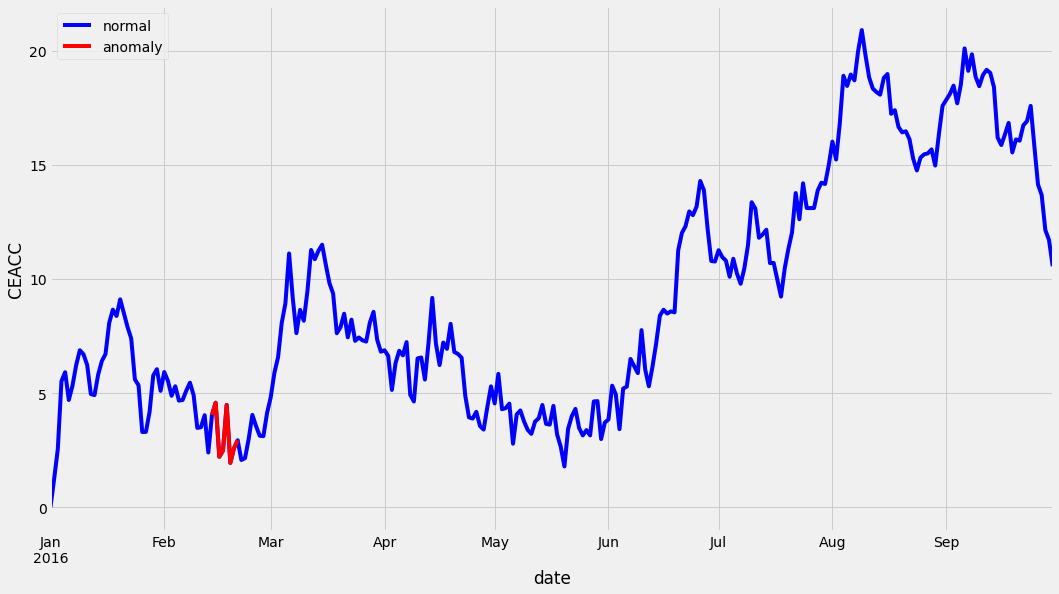

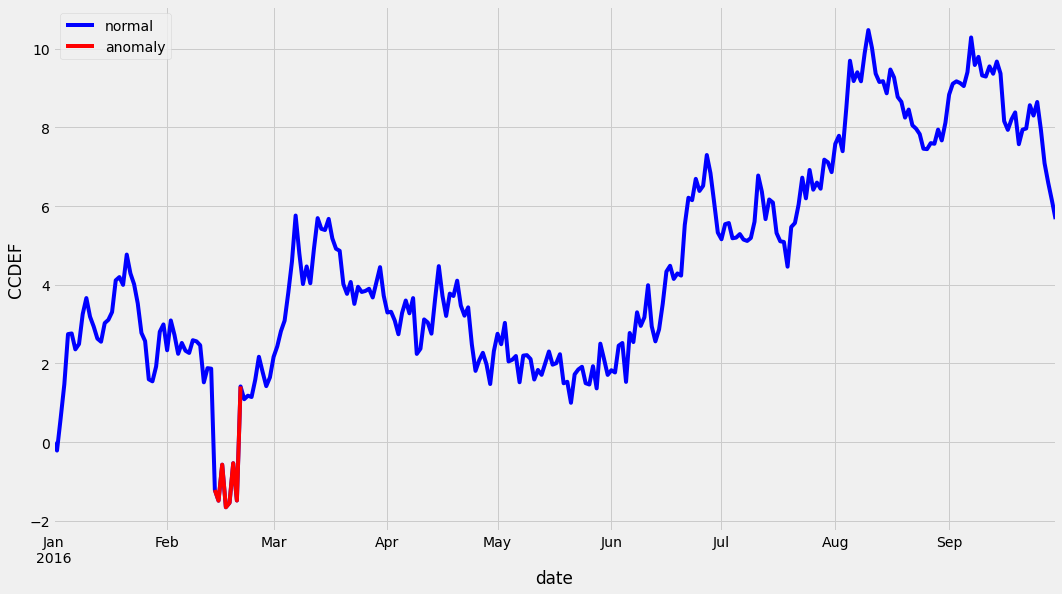

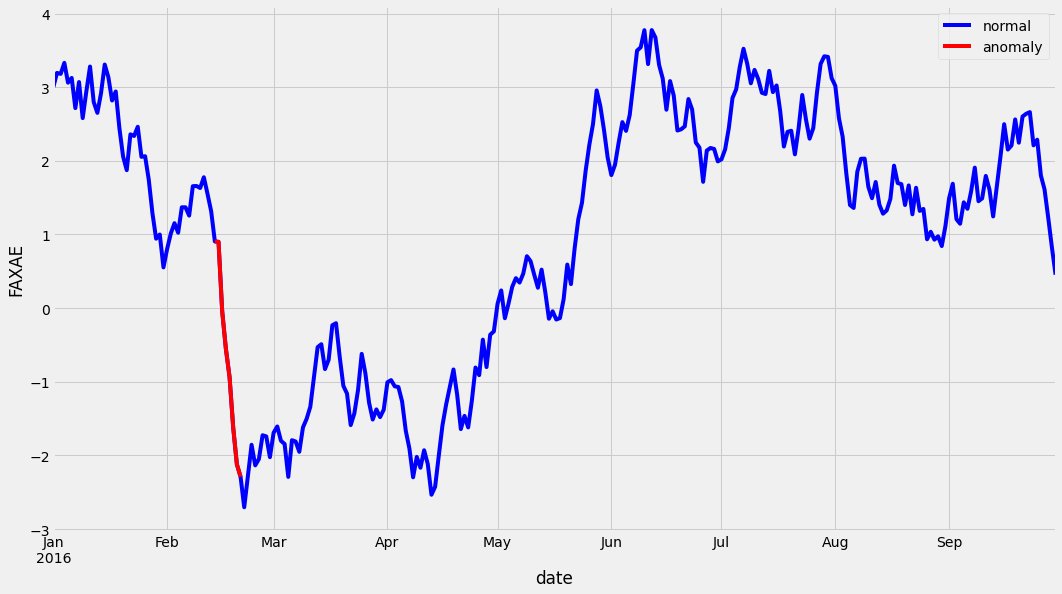

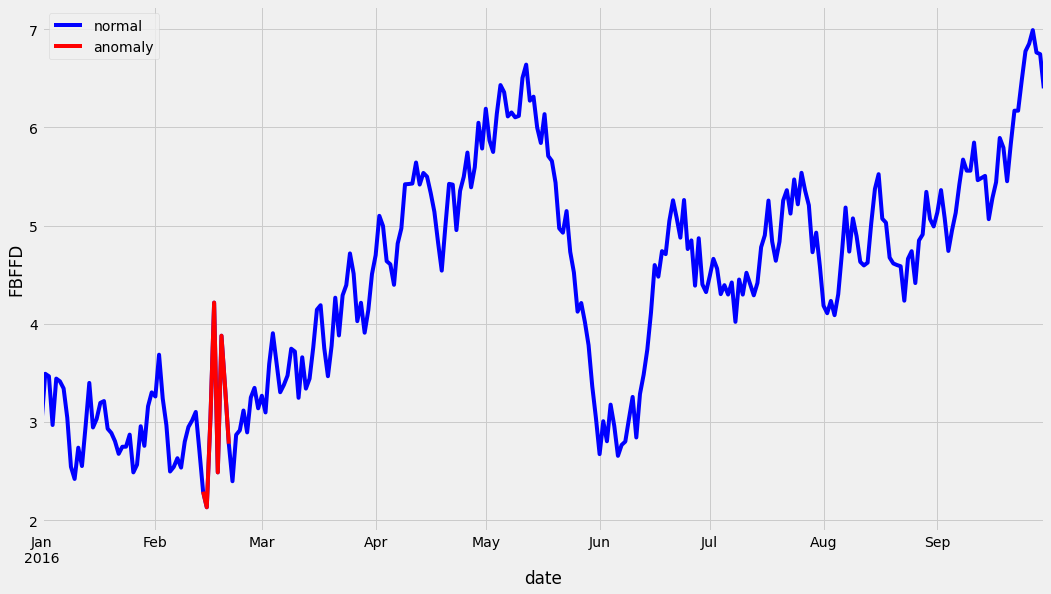

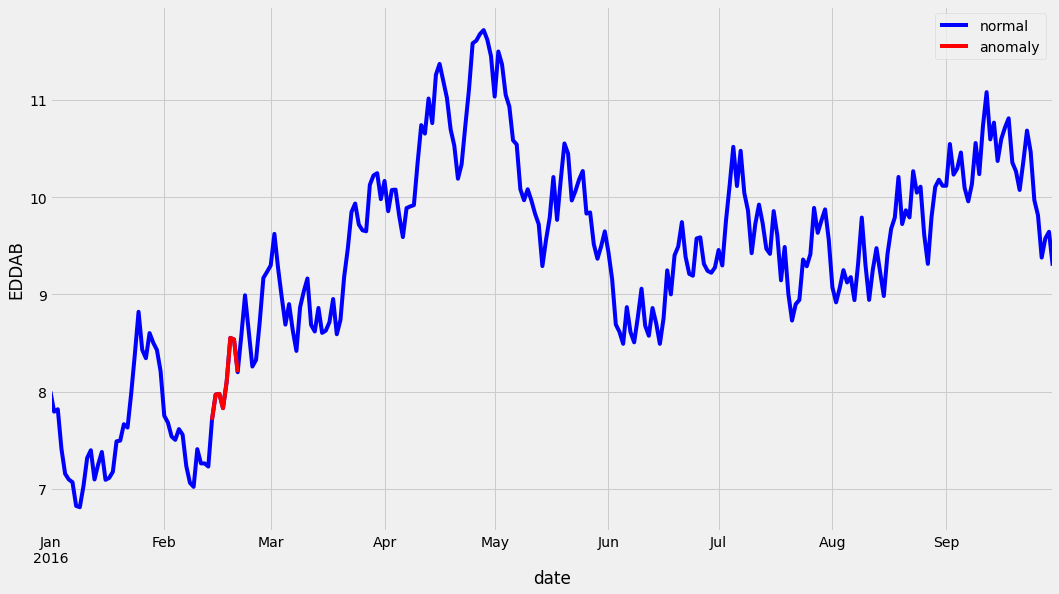

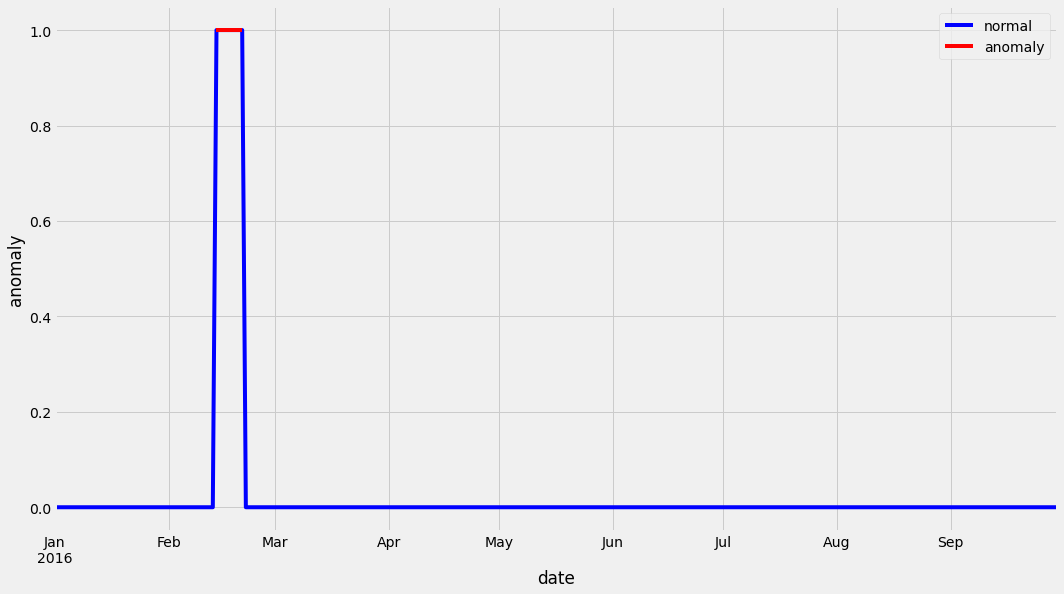

In [7]:
# plotting the columns against date

for col in df_train.columns:
    plt.figure(figsize=(16, 9))
    df_train[col].plot(c='blue', label='normal')
    df_train[col]['2016-02-14':'2016-02-21'].plot(c='red', label='anomaly')
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [8]:
# splitting data into X_train and y_train
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]


In [9]:

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)


 Variance explained by  1  components :  87.01 %
 Variance explained by  2  components :  94.92 %
 Variance explained by  3  components :  98.5 %
 Variance explained by  4  components :  99.34 %
 Variance explained by  5  components :  100.0 %


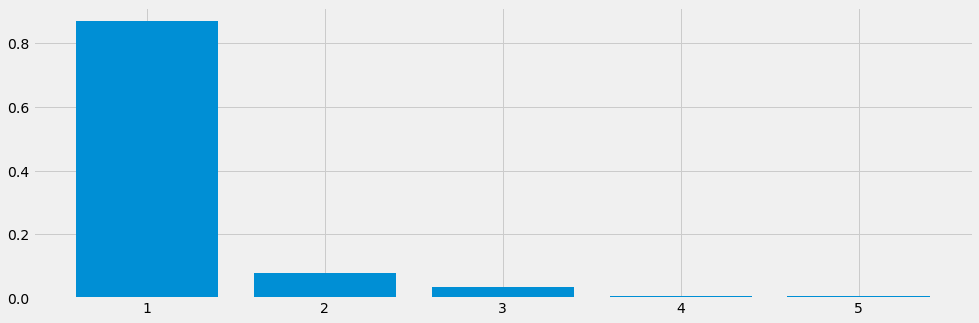

In [10]:
# plotting eigen values
exp_variance=pca.explained_variance_ratio_
plt.figure(figsize=(15, 5))
plt.bar(range(1, len(exp_variance)+1),exp_variance)
# print(pca.explained_variance_ratio_)
for i in range(1,len(exp_variance)+1):
    print(" Variance explained by ",i," components : ",np.round(np.sum(exp_variance[:i])*100,2),"%")


In [11]:
# Calcuating reconstruction loss
# creating a function to calculate reconstruction loss
# input : 
#       1) original dataframe
#       2) dataframe created from inverse transform of PCA
# output:
#         reconstruction loss dataframe

def reconstructionloss(normal_df, reduced_df):
    loss = np.sum((np.array(normal_df)-np.array(reduced_df))**2, axis=1)
    # saving loss in a dataframe
    loss = pd.DataFrame(data=loss, index=normal_df.index, columns=['loss'])
    return loss


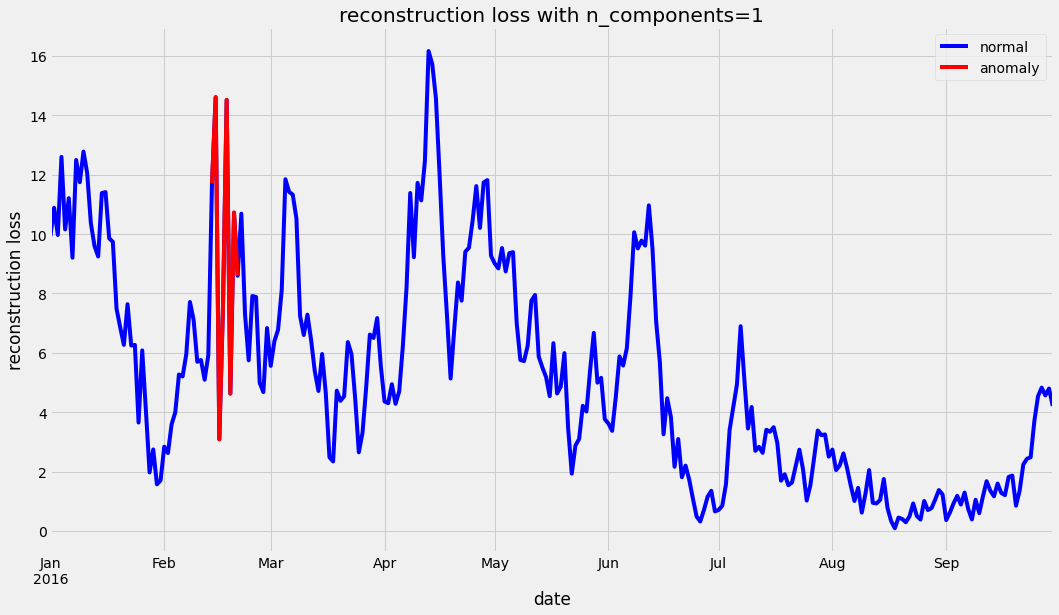

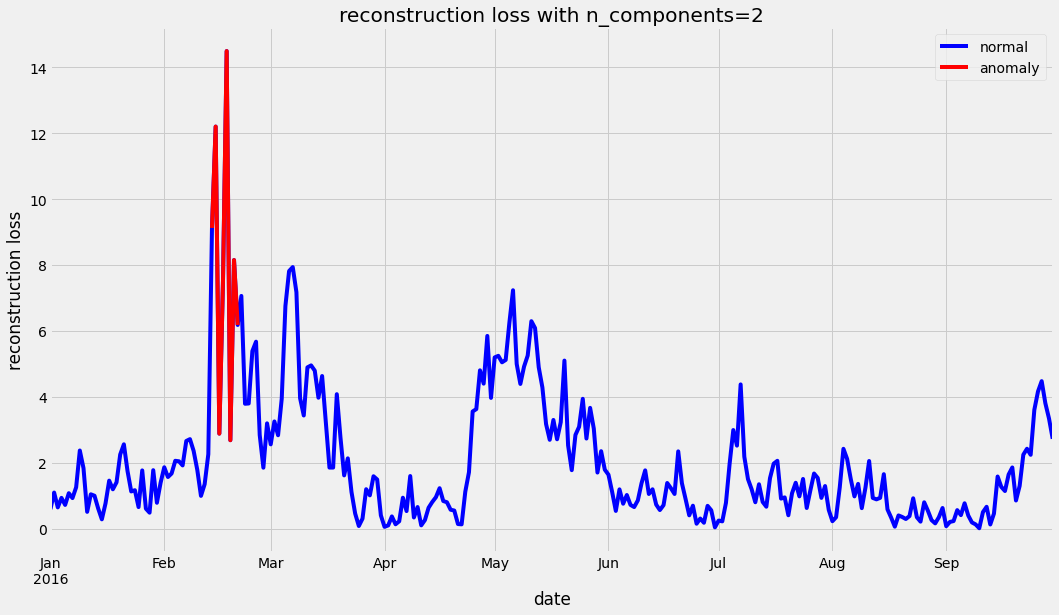

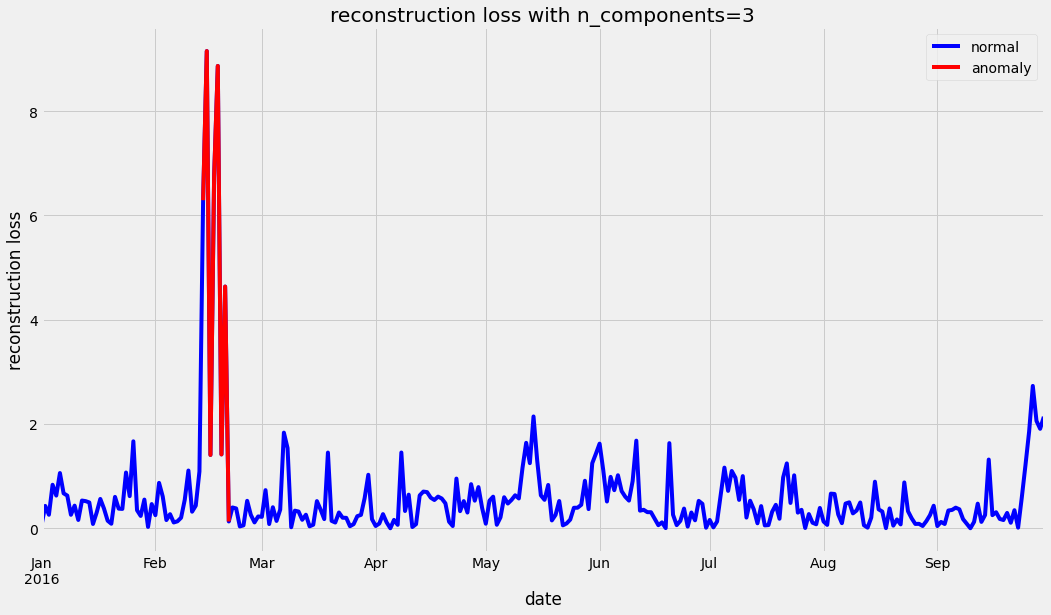

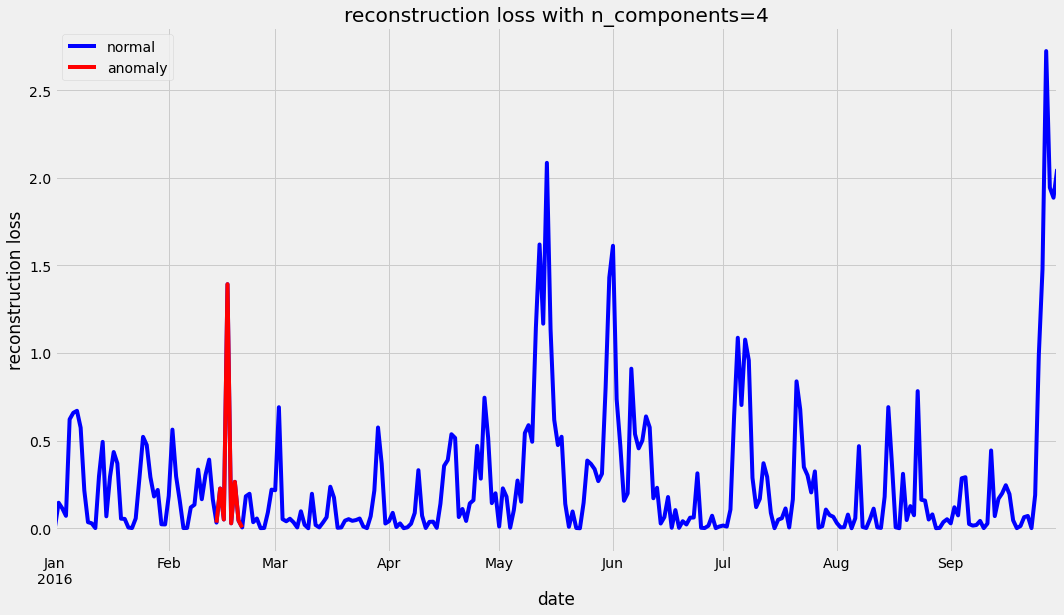

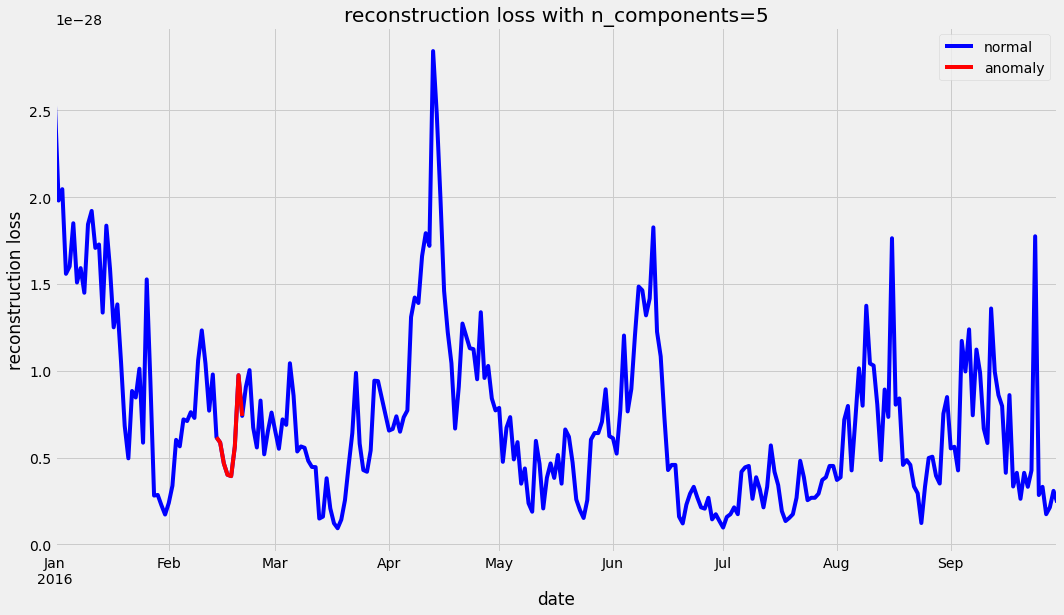

In [12]:
# running a loop throught from n_components 1 to 5
for i in range(1, len(X_train.columns)+1):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)

    # saving this in a dataframe
    X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)
    X_train_pca.head()

    # inversing the transform and saving in a dataframe
    X_train_pca_inverse = pca.inverse_transform(X_train_pca)
    X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse,
                                       index=X_train.index)

    # calculating reconstruction loss
    loss = reconstructionloss(X_train, X_train_pca_inverse)

    # plotting reconstruction loss against date
    ax = loss.plot(c='blue', figsize=(16, 9))
    loss['2016-02-14':'2016-02-21'].plot(c='red', ax=ax)
    ax.legend(['normal', 'anomaly'])
    plt.title(f'reconstruction loss with n_components={i}')
    plt.ylabel('reconstruction loss')
    plt.show()

 we see that with n_components=3 the graph is better
 able to segregate the anomaly.

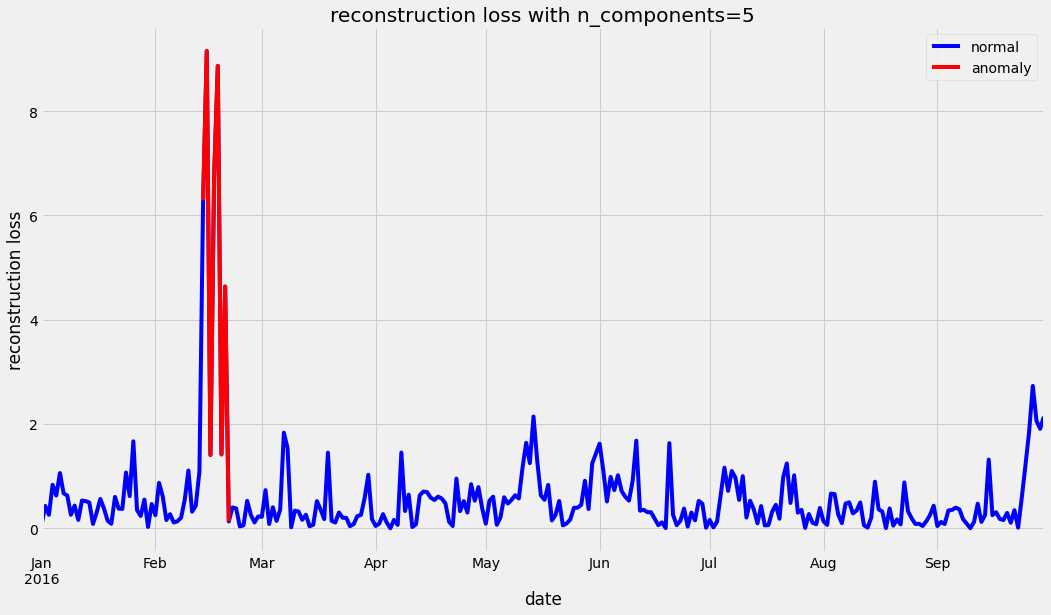

In [13]:
# pca with n components=3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
# saving this in a dataframe
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)
X_train_pca.head()

# inversing the transform and saving in a dataframe
X_train_pca_inverse = pca.inverse_transform(X_train_pca)
X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse,
                                   index=X_train.index)

loss = reconstructionloss(X_train, X_train_pca_inverse)

# plotting reconstruction loss against date
ax = loss.plot(c='blue', figsize=(16, 9))
loss['2016-02-14':'2016-02-21'].plot(c='red', ax=ax)
ax.legend(['normal', 'anomaly'])
plt.title(f'reconstruction loss with n_components={i}')
plt.ylabel('reconstruction loss')
plt.show()


In [14]:
# From above graph we see that when loss is above 3 the readings show anomaly
# Therefore we consider 3 as threshold for separating normal data with anomaly



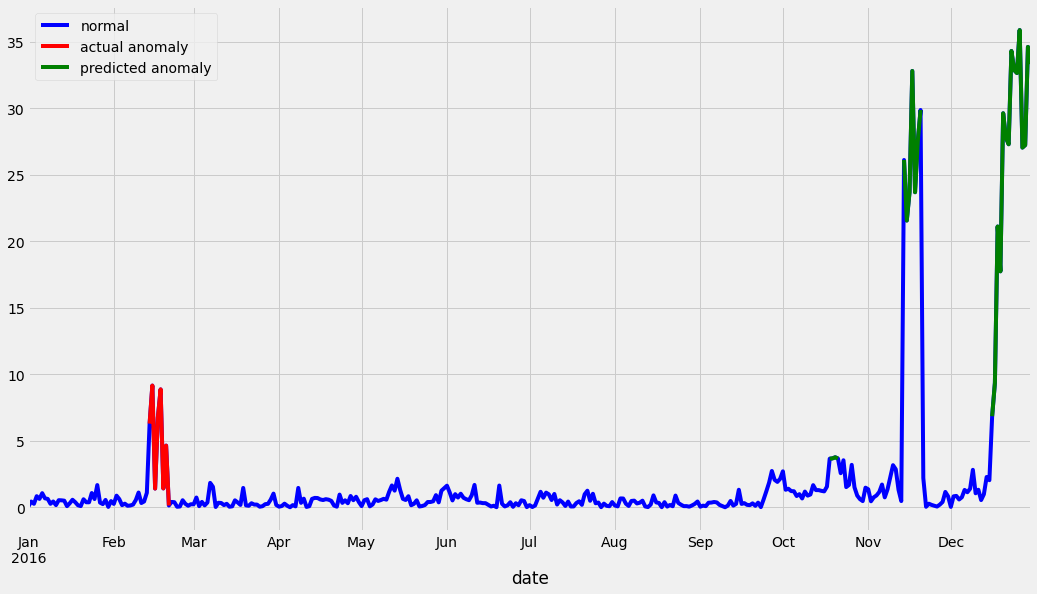

In [15]:
# applying pca on entire dataset(all 12 months)

df_pca = pca.transform(df)
# saving this in a dataframe
df_pca = pd.DataFrame(data=df_pca, index=df.index)

# inversing the transform and saving in a dataframe
df_pca_inverse = pca.inverse_transform(df_pca)
df_pca_inverse = pd.DataFrame(data=df_pca_inverse,
                                   index=df.index)

loss = reconstructionloss(df, df_pca_inverse)

# plotting all data
ax = loss.plot(c='blue', figsize=(16, 9))
# plotting actual anomaly
loss['2016-02-14':'2016-02-21'].plot(c='red', ax=ax)
# plotting predicting anomaly for last 3 months with loss>3 as threshold
loss['2016-10-01':'2016-12-30'][loss>3].plot(c='green', label='anomaly', ax=ax)
ax.legend(['normal', 'actual anomaly','predicted anomaly'])
plt.show()


In [16]:
# adding loss and predicted anomaly to results dataframe
results = loss.copy()

# predicting anomaly with 3 as threshold i.e when loss>3 then
# we consider it as anomaly
results['anomaly'] = 0
results['anomaly'][results.loss >3] = 1 # considering anomaly when loss>3
results.head()

,loss,anomaly
date,,
2016-01-01,0.063105,0
2016-01-02,0.429160,0
2016-01-03,0.259014,0
2016-01-04,0.834649,0
2016-01-05,0.626984,0


In [17]:
# Printing results for last 3 months
results['2016-10-01':'2016-12-30'][results['anomaly']==1]


,loss,anomaly
date,,
2016-10-18,3.653006,1
2016-10-19,3.675894,1
2016-10-20,3.758295,1
2016-10-21,3.665862,1
2016-10-23,3.534066,1
2016-10-26,3.188545,1
2016-11-10,3.164290,1
2016-11-14,26.122339,1
2016-11-15,21.567531,1


In [18]:
# adding 'consecutive_days' columns to get consecutive anomaly days count
results['consecutive days'] = results.anomaly.groupby((results.anomaly != results.anomaly.shift()).cumsum()).transform('size') * results.anomaly
results['2016-10-01':'2016-12-30'][results['anomaly']==1]

,loss,anomaly,consecutive days
date,,,
2016-10-18,3.653006,1,4
2016-10-19,3.675894,1,4
2016-10-20,3.758295,1,4
2016-10-21,3.665862,1,4
2016-10-23,3.534066,1,1
2016-10-26,3.188545,1,1
2016-11-10,3.164290,1,1
2016-11-14,26.122339,1,7
2016-11-15,21.567531,1,7


In [19]:
anomaly_days=results.groupby(['consecutive days']).count()
anomaly_days


,loss,anomaly
consecutive days,,
0,331,331
1,4,4
2,4,4
4,4,4
7,7,7
15,15,15


 From anomaly_days we see that
 - There were 331 days with no anomaly
 - 4 sessions where anomaly lasted for 1 day
 - 4 sessions where anomaly lasted for consecutive 2 days
 - 1 session where anomaly lasted for consecutive 4 days
 - 1 session where anomaly lasted for consecutive 15 days

# Fin